In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

In [7]:
df = pd.read_csv("/Users/zeldudu/Documents/Zalo Received Files/CanTho_data_model copy 2.csv")

In [8]:
df.head()

,Index,District,Commune,Village,Area (ha),Season,Variety,Yield,Nfert,P2O5fert,...,CF,N2OfertE,STburE,GHGE,ProdCost,GrossInc,NetInc,Train_1M5R,Train_SRP,Train_No
0,245.0,Vĩnh Thạnh,Thạnh_Lợi,C2,2.59,WS2223,dai_thom,8.3,114,86,...,0.82,237.0,567,"3,534.14","23,519,645","27,980,756","52,297,297",0.0,1.0,0.0
1,246.0,Vĩnh Thạnh,Thạnh_Lợi,C2,1.30,WS2223,dai_thom,8.1,124,78,...,1.23,258.0,551,"6,177.53","22,554,585","27,576,177","50,884,615",0.0,1.0,0.0
2,247.0,Vĩnh Thạnh,Thạnh_Lợi,C2,2.59,WS2223,dai_thom,6.9,80,55,...,0.84,167.0,332,"2,960.68","22,335,246","20,846,204","43,783,784",1.0,0.0,0.0
3,248.0,Vĩnh Thạnh,Thạnh_Lợi,C2,1.94,WS2223,dai_thom,7.2,80,87,...,0.83,166.0,1,"2,967.99","29,845,534","17,157,945","47,628,866",1.0,1.0,0.0
4,249.0,Vĩnh Thạnh,Thạnh_Lợi,C2,1.23,WS2223,dai_thom,7.8,92,72,...,1.36,192.0,1,"6,628.95","18,935,439","29,598,859","49,210,732",0.0,0.0,1.0


In [5]:
df.rename(columns=lambda x: x.strip(), inplace=True)
print(df)

        District    Commune Village  Gender Ethnicity  Age  Area (ha)  Season  \
0     Vĩnh Thạnh  Thạnh_Lợi      C2    Male      kinh   49       2.59  WS2223   
1     Vĩnh Thạnh  Thạnh_Lợi      C2    Male      kinh   51       1.30  WS2223   
2     Vĩnh Thạnh  Thạnh_Lợi      C2    Male      kinh   62       2.59  WS2223   
3     Vĩnh Thạnh  Thạnh_Lợi      C2    Male      kinh   59       1.94  WS2223   
4     Vĩnh Thạnh  Thạnh_Lợi      C2    Male      kinh   45       1.23  WS2223   
...          ...        ...     ...     ...       ...  ...        ...     ...   
2995  Vĩnh Thạnh  Thạnh_Lợi      C2  Female      kinh   64       1.56    AW23   
2996  Vĩnh Thạnh  Thạnh_Lợi      D2  Female      kinh   47       1.30    AW23   
2997  Vĩnh Thạnh  Thạnh_Lợi      D2  Female      kinh   44       1.81    AW23   
2998  Vĩnh Thạnh  Thạnh_Lợi      D2    Male      kinh   49       1.81    AW23   
2999  Vĩnh Thạnh  Thạnh_Lợi      D2  Female      kinh   45       2.59    AW23   

       Variety Yield  ...  

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 37 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   District        3000 non-null   object 
 1   Commune         3000 non-null   object 
 2   Village         3000 non-null   object 
 3   Gender          3000 non-null   object 
 4   Ethnicity       3000 non-null   object 
 5   Age             3000 non-null   int64  
 6   Area (ha)       3000 non-null   float64
 7   Season          3000 non-null   object 
 8   Variety         2915 non-null   object 
 9   Yield           3000 non-null   object 
 10  Nfert           2993 non-null   object 
 11  P2O5fert        2993 non-null   object 
 12  K2Ofert         2993 non-null   object 
 13  ORGfert         3000 non-null   object 
 14  RSGroup         3000 non-null   object 
 15  prePSTrem       3000 non-null   object 
 16  prePSTbur       3000 non-null   object 
 17  prePSTinc       3000 non-null   o

In [6]:
columns = ['TotGHGE']

for column in columns:
    df[column] = df[column].str.replace(",","",regex=True)
    
for column in columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')

In [7]:
df = df.replace('no_fert_info', pd.NA)
df = df.replace('no_rice', pd.NA)
df = df.dropna()

In [7]:
columns_to_convert = ['Yield']

for column in columns_to_convert:
    df[column] = pd.to_numeric(df[column], errors='coerce')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 37 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   District        3000 non-null   object 
 1   Commune         3000 non-null   object 
 2   Village         3000 non-null   object 
 3   Gender          3000 non-null   object 
 4   Ethnicity       3000 non-null   object 
 5   Age             3000 non-null   int64  
 6   Area (ha)       3000 non-null   float64
 7   Season          3000 non-null   object 
 8   Variety         2915 non-null   object 
 9   Yield           2912 non-null   float64
 10  Nfert           2993 non-null   object 
 11  P2O5fert        2993 non-null   object 
 12  K2Ofert         2993 non-null   object 
 13  ORGfert         3000 non-null   object 
 14  RSGroup         3000 non-null   object 
 15  prePSTrem       3000 non-null   object 
 16  prePSTbur       3000 non-null   object 
 17  prePSTinc       3000 non-null   o

In [1]:
import scipy
from scipy.stats import pearsonr

df = df.drop(columns=['District', 'Commune', 'Village', 'Season', 'Variety', 'CEmethod'],inplace=True)
df.fillna(df.median(), inplace=True)

# Calculate the correlation matrix
correlation_matrix = df.corr()

yield_correlations = correlation_matrix['Yield'].sort_values()

# Visualize the correlations with a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix with Yield Highlighted')
plt.show()


print("Correlations between Yield and other factors:")
correlation_results = {}

for column in df.columns:
    if column != 'Yield':
        corr, p_value = pearsonr(df['Yield'], df[column])
        correlation_results[column] = (corr, p_value)
        
for key, value in correlation_results.items():
    print(f"{key}: Coefficient = {value[0]:.3f}, P-value = {value[1]:.3g}")

NameError: name 'df' is not defined

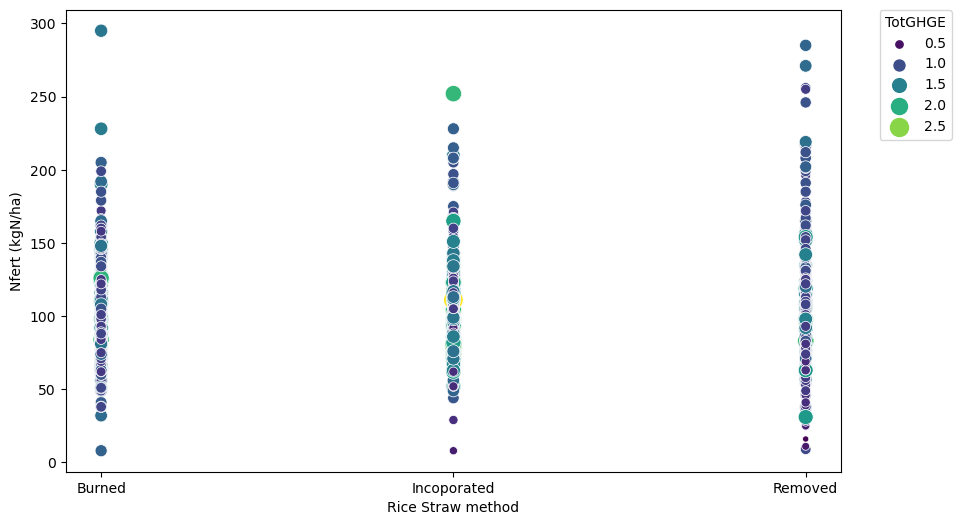

In [35]:
# Filter the DataFrame
df_rem = df['RSGroup'].str.contains('rem')
df_bur = df['RSGroup'].str.contains('bur')
df_inc = df['RSGroup'].str.contains('inc')

# Combine the filtered DataFrames with an identifier for the season
df['RS_Group'] = ''
df.loc[df_rem, 'RS_Group'] = 'Removed'
df.loc[df_bur, 'RS_Group'] = 'Burned'
df.loc[df_inc, 'RS_Group'] = 'Incoporated'

season_data = df[df_rem | df_bur | df_inc]

# Create the scatter plot
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(data=season_data, x='RS_Group', y='Nfert', hue='CF', palette='viridis', size='CF', sizes=(20, 200))

#plt.title('CEmethod + Yield + Nfert')
plt.xlabel('Rice Straw method')
plt.ylabel('Nfert (kgN/ha)')
plt.legend(title='TotGHGE', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [13]:
df_a = df['RSGroup']=='bur'
df_a.value_counts()

RSGroup
False    1697
True     1197
Name: count, dtype: int64

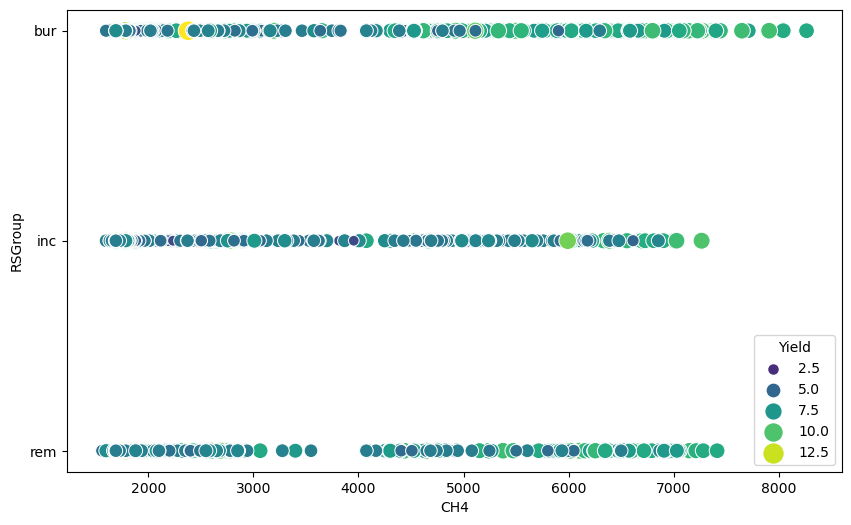

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the DataFrame for the specific seasons
df_man_b = df['CEmethod'].str.contains('manual_broadcast')
df_man_d = df['CEmethod'].str.contains('manual_drum')
df_man_t = df['CEmethod'].str.contains('manual_transplant')
df_sb = df['CEmethod'].str.contains('seed_blower')
df_mer_h = df['CEmethod'].str.contains('merch_hill')
df_mer_d = df['CEmethod'].str.contains('merch_drone')
df_mer_r = df['CEmethod'].str.contains('merch_row')
df_mer_t = df['CEmethod'].str.contains('merch_transplant')

# Combine the filtered DataFrames with an identifier for the season
df['CE_method'] = ''
df.loc[df_man_b, 'CE_method'] = 'Manual Broadcast'
df.loc[df_man_d, 'CE_method'] = 'Manual Drum'
df.loc[df_man_t, 'CE_method'] = 'Manual Transplant'
df.loc[df_sb, 'CE_method'] = 'Seed Blower'
df.loc[df_mer_h, 'CE_method'] = 'Merch Hill'
df.loc[df_mer_d, 'CE_method'] = 'Merch Drone'
df.loc[df_mer_r, 'CE_method'] = 'Merch Row'
df.loc[df_mer_t, 'CE_method'] = 'Merch Transplant'

# Filter the DataFrame to only include relevant rows
season_data = df[df_man_b | df_man_d | df_man_t | df_sb | df_mer_h | df_mer_d | df_mer_r | df_mer_t]

# Create the scatter plot
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(data=season_data, x='CH4soilE', y='RSGroup', hue='Yield', palette='viridis', size='Yield', sizes=(20, 200))

#plt.title('CEmethod + Yield + Nfert')
plt.xlabel('CH4')
plt.ylabel('RSGroup')
#plt.legend(title='TotGHGE', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [15]:
df['GHGE'] = df['CH4soilE'] + df['N20'] + df['STburE']

In [16]:
df = df[df['CF'] < 3.3]

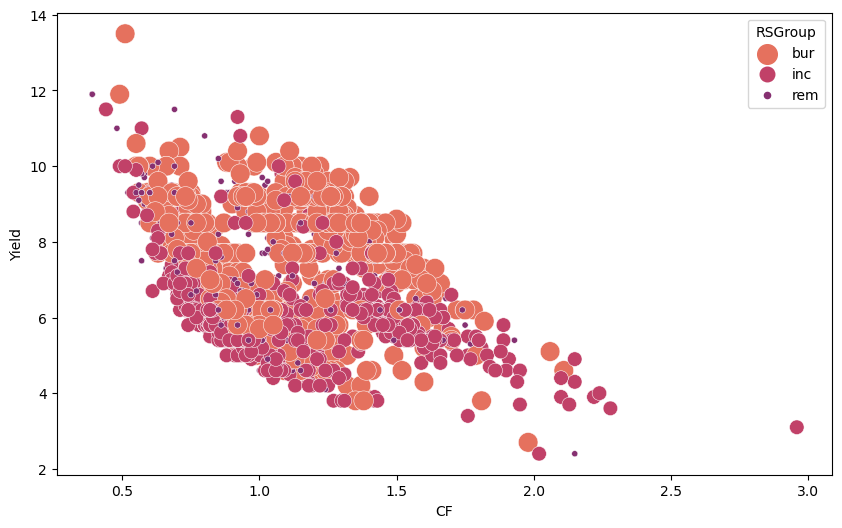

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the DataFrame for the specific seasons
df_2 = df['Water'].str.contains('multiple')
df_1 = df['Water'].str.contains('single')

# Combine the filtered DataFrames with an identifier for the season
df['Water_'] = ''
df.loc[df_2, 'Water_'] = 'Multiple'
df.loc[df_1, 'Water_'] = 'Single

season_data = df[df_2 | df_1]

plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(data=season_data, x='CF', y='Yield', hue='RSGroup', palette='flare', size='RSGroup', sizes=(20, 200))

#plt.title('Water + TotGHGE + Nfert')
plt.xlabel('CF')
plt.ylabel('Yield')
plt.show()

In [18]:
df_WS = df['Season'].str.contains('WS2223')
df_AW = df['Season'].str.contains('AW23')
df_SA = df['Season'].str.contains('SA23')

In [19]:
from prettytable import PrettyTable 
 
# Specify the Column Names while initializing the Table 
myTable = PrettyTable(["Season", "PSTbur", "PSTinc", "PSTrem"]) 
 
myTable.add_row(["WS", "61.5", "7.4", "31.1 %"]) 
myTable.add_row(["AW", "10.6", "22.9", "66.5 %"]) 
myTable.add_row(["SA", "43.0", "31.9", "25.1 %"]) 
 
print(myTable)

print("Average % of rice straw burned in WS:", df[df_WS]['PSTbur'].mean())
print("Average % of rice straw burned in AW:", df[df_AW]['PSTbur'].mean())
print("Average % of rice straw burned in SA:", df[df_SA]['PSTbur'].mean())

print("Average % of rice straw removed in WS:", df[df_WS]['PSTrem'].mean())
print("Average % of rice straw removed in AW:", df[df_AW]['PSTrem'].mean())
print("Average % of rice straw removed in SA:", df[df_SA]['PSTrem'].mean())

print("Average % of rice straw incorporated in WS:", df[df_WS]['PSTinc'].mean())
print("Average % of rice straw incorporated in AW:", df[df_AW]['PSTinc'].mean())
print("Average % of rice straw incorporated in SA:", df[df_SA]['PSTinc'].mean())

+--------+--------+--------+--------+
| Season | PSTbur | PSTinc | PSTrem |
+--------+--------+--------+--------+
|   WS   |  61.5  |  7.4   | 31.1 % |
|   AW   |  10.6  |  22.9  | 66.5 % |
|   SA   |  43.0  |  31.9  | 25.1 % |
+--------+--------+--------+--------+
Average % of rice straw burned in WS: 61.79554655870445
Average % of rice straw burned in AW: 10.583242655059848
Average % of rice straw burned in SA: 42.943031536113935
Average % of rice straw removed in WS: 30.855263157894736
Average % of rice straw removed in AW: 23.052230685527746
Average % of rice straw removed in SA: 31.95829094608342
Average % of rice straw incorporated in WS: 7.34919028340081
Average % of rice straw incorporated in AW: 66.3645266594124
Average % of rice straw incorporated in SA: 25.098677517802646


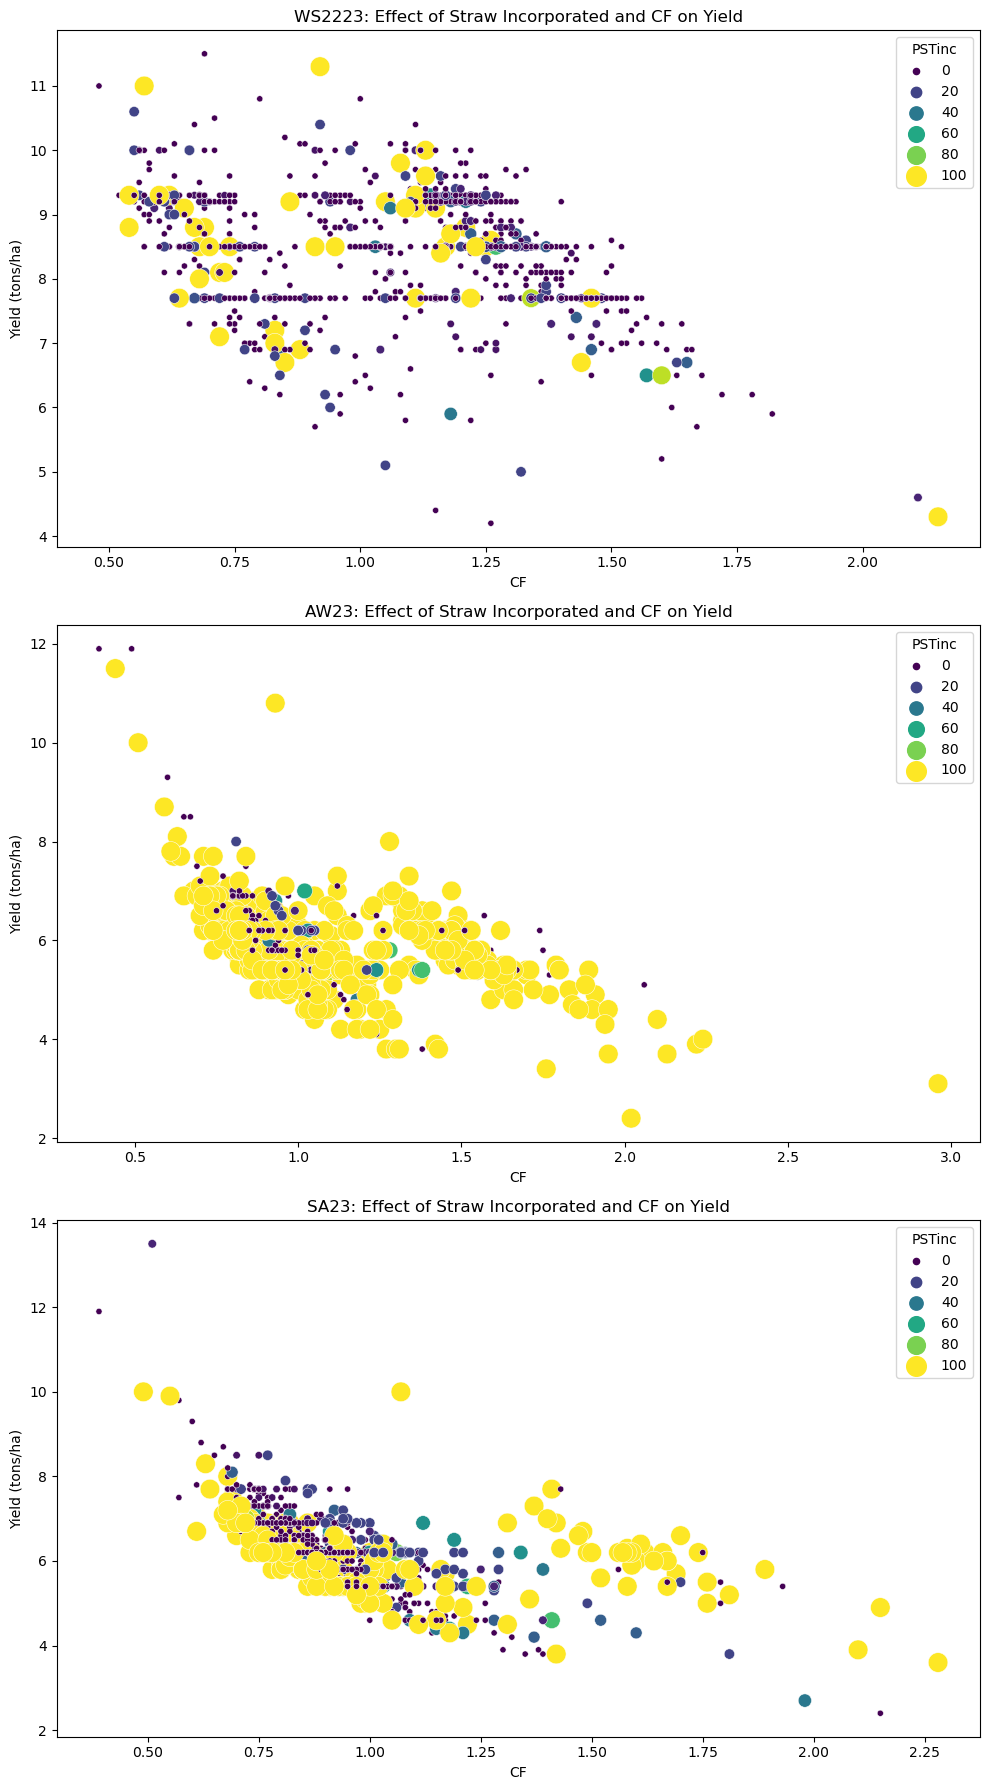

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with three subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 18))

# WS2223
sns.scatterplot(ax=axes[0], data=df[df_WS], x='CF', y='Yield', hue='PSTinc', palette='viridis', size='PSTinc', sizes=(20, 200))
axes[0].set_title('WS2223: Effect of Straw Incorporated and CF on Yield')
axes[0].set_xlabel('CF')
axes[0].set_ylabel('Yield (tons/ha)')

# AW23
sns.scatterplot(ax=axes[1], data=df[df_AW], x='CF', y='Yield', hue='PSTinc', palette='viridis', size='PSTinc', sizes=(20, 200))
axes[1].set_title('AW23: Effect of Straw Incorporated and CF on Yield')
axes[1].set_xlabel('CF')
axes[1].set_ylabel('Yield (tons/ha)')

# SA23
sns.scatterplot(ax=axes[2], data=df[df_SA], x='CF', y='Yield', hue='PSTinc', palette='viridis', size='PSTinc', sizes=(20, 200))
axes[2].set_title('SA23: Effect of Straw Incorporated and CF on Yield')
axes[2].set_xlabel('CF')
axes[2].set_ylabel('Yield (tons/ha)')

plt.tight_layout()
plt.show()


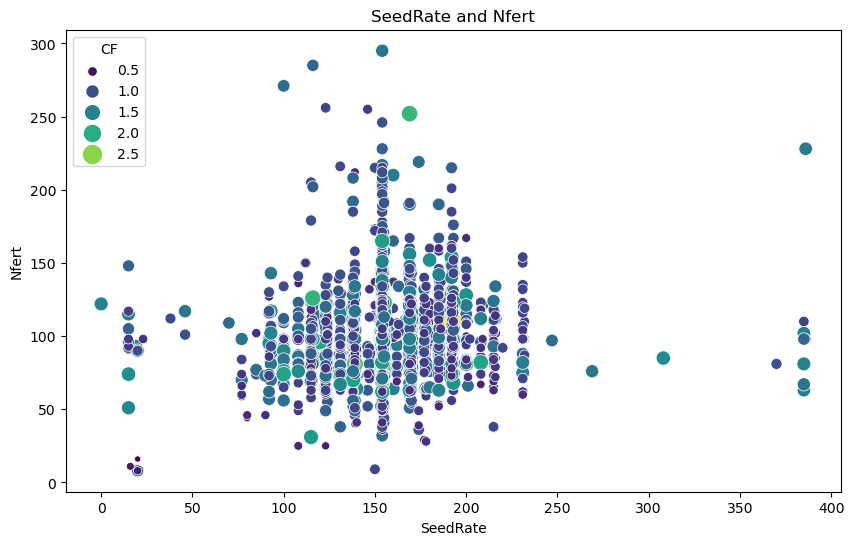

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(data=df, x=df['SeedRate'], y=df['Nfert'], hue=df['CF'], palette='viridis', size='CF', sizes=(20, 200))
plt.title('SeedRate and Nfert')
plt.xlabel('SeedRate')
plt.ylabel('Nfert')
#plt.colorbar(scatter.collections[5], label='PSTinc')
plt.show()

In [1]:
df = df[df['Season']=='AW23']

lower_bound = df['Yield'].quantile(0.1)
upper_bound = df['Yield'].quantile(0.9)

df = df[(df['Yield'] >= lower_bound) & (df['Yield'] <= upper_bound)]

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='RSGroup', y='Yield', hue='Water', palette='flare') 

category_counts = df['RSGroup'].value_counts().to_dict()

# Define the correct order of the groups
group_order = ['bur', 'rem', 'inc']

# Add the count annotations to the plot in the correct order
for i, group in enumerate(group_order):
    count = category_counts.get(group, 0)
    plt.text(i, df['Yield'].max() + (df['Yield'].max() * 0.01), f'n={count}', ha='center', color='black')

NameError: name 'df' is not defined

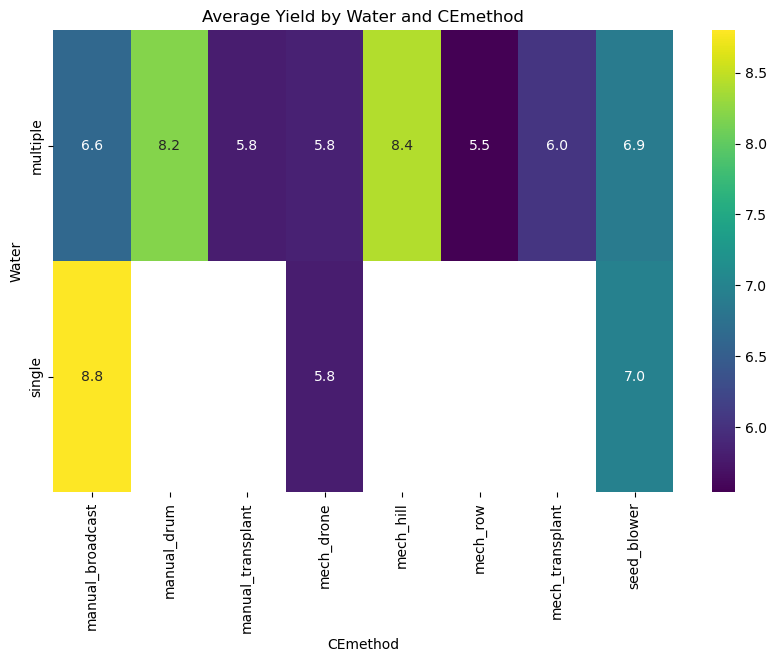

In [25]:
pivot_table = season_data.pivot_table(values='Yield', index='Water', columns='CEmethod', aggfunc='mean')

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='viridis', fmt=".1f")

plt.title('Average Yield by Water and CEmethod')
plt.xlabel('CEmethod')
plt.ylabel('Water')
plt.show()